In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

<AxesSubplot:>

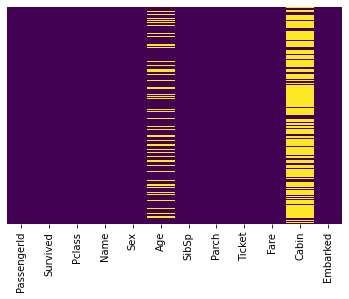

In [24]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

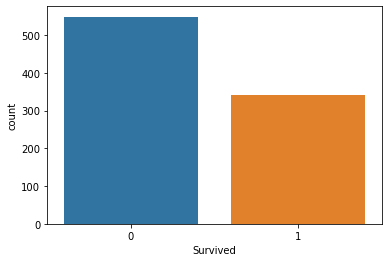

In [25]:
sns.countplot(x='Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

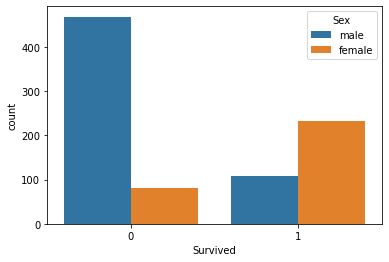

In [26]:
sns.countplot(x='Survived', hue='Sex', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

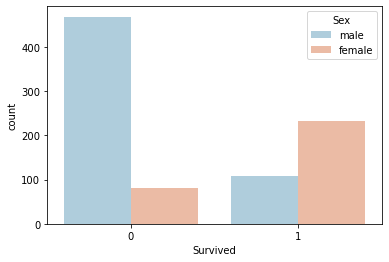

In [28]:
sns.countplot(x='Survived', hue='Sex', data = train, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

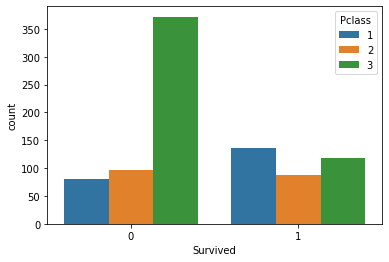

In [32]:
sns.countplot(x='Survived', hue='Pclass', data = train)

C:\Users\mujah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

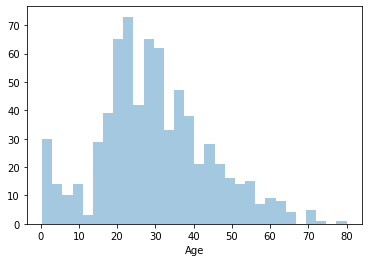

In [33]:
sns.distplot(train['Age'].dropna(), kde=False, bins = 30)

<AxesSubplot:ylabel='Frequency'>

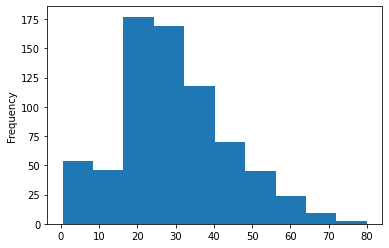

In [34]:
train['Age'].plot.hist()

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

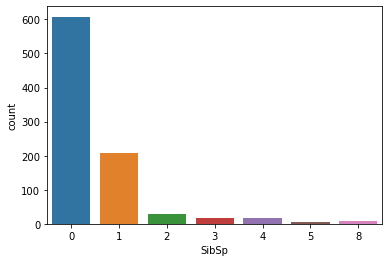

In [36]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

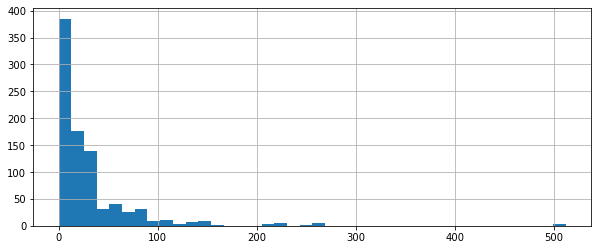

In [38]:
train['Fare'].hist(bins=40, figsize=(10,4))

38.233440860215055
29.87763005780347
25.14061971830986


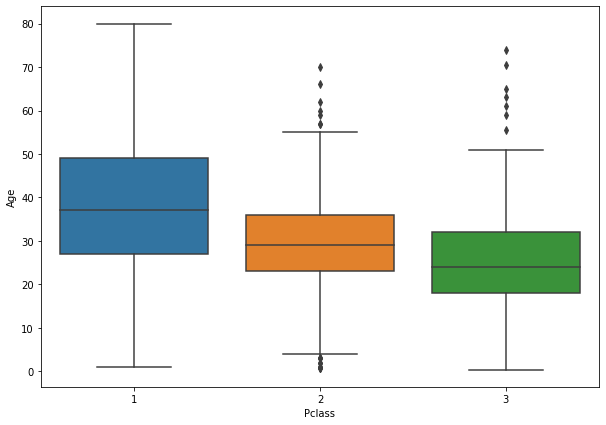

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)
print(train[train['Pclass'] == 1]['Age'].mean())
print(train[train['Pclass'] == 2]['Age'].mean())
print(train[train['Pclass'] == 3]['Age'].mean())

In [68]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age

In [69]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

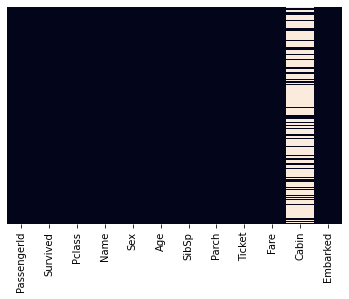

In [70]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [72]:
train.drop('Cabin', axis=1, inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

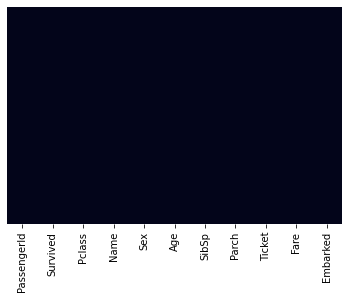

In [74]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [75]:
train.dropna(inplace=True)

<AxesSubplot:>

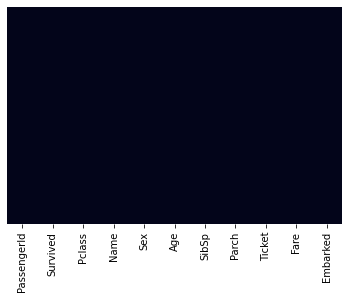

In [76]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [78]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [80]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [81]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [82]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [83]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [84]:
train = pd.concat([train,sex,embark], axis = 1)

In [85]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [86]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [89]:
train.drop('PassengerId', axis = 1, inplace = True)

In [90]:
train.he0ad()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [91]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1)

In [98]:
y_test

655    0
Name: Survived, dtype: int64

In [99]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
809,1,33.0,1,0,53.1000,0,0,1
510,3,29.0,0,0,7.7500,1,1,0
422,3,29.0,0,0,7.8750,1,0,1
633,1,38.0,0,0,0.0000,1,0,1
475,1,38.0,0,0,52.0000,1,0,1
...,...,...,...,...,...,...,...,...
669,1,38.0,1,0,52.0000,0,0,1
517,3,24.0,0,0,24.1500,1,1,0
474,3,22.0,0,0,9.8375,0,0,1
772,2,57.0,0,0,10.5000,0,0,1


In [100]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression(max_iter=99)

In [107]:
logmodel.fit(x_train, y_train)

C:\Users\mujah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=99)

In [109]:
test_data = pd.read_csv('test.csv')

In [110]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
test_data.drop('Name', axis = 1, inplace = True)

In [114]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S


In [115]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:>

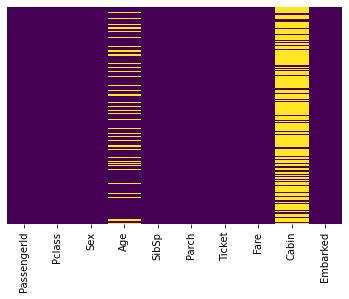

In [116]:
sns.heatmap(test_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [118]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age
    
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [119]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,24.0,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

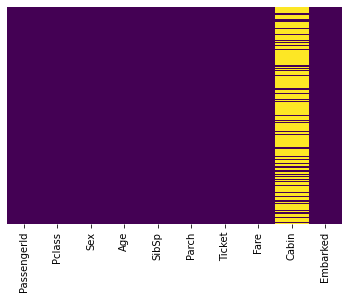

In [120]:
sns.heatmap(test_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [121]:
test_data.drop('Cabin', axis=1, inplace=True)

In [122]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,24.0,0,0,359309,8.0500,S


<AxesSubplot:>

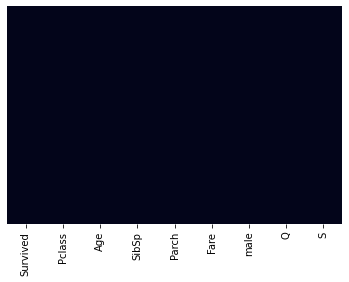

In [123]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [124]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,24.0,0,0,359309,8.0500,S


In [125]:
pd.get_dummies(test_data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [127]:
sex1 = pd.get_dummies(test_data['Sex'], drop_first=True)

In [128]:
sex1.head()

,male
0,1
1,0
2,1
3,1
4,0


In [130]:
embark1 = pd.get_dummies(test_data['Embarked'], drop_first = True)

In [131]:
test_data = pd.concat([test_data,sex1,embark1], axis = 1)

In [132]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,female,22.0,1,1,3101298,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,A.5. 3236,8.0500,S,1,0,1
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C,0,0,0
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1
416,1308,3,male,24.0,0,0,359309,8.0500,S,1,0,1


In [134]:
test_data.drop(['Sex', 'Embarked', 'Ticket'], axis=1, inplace = True)

In [135]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


In [136]:
test_data.drop('PassengerId', axis = 1, inplace = True)

In [137]:
test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1


In [138]:
predictions = logmodel.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [139]:
test_data.isnull()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False


In [140]:
pd.set_option('display.max_rows', None)

In [141]:
test_data.isnull()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [142]:
test_data['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
30      26.0000
31      31.5000
32      20.5750
33      23.4500
34      57.7500
35       7.2292
36       8.0500
37       8.6625
38       9.5000
39      56.4958
40      13.4167
41      26.5500
42       7.8500
43      13.0000
44      52.5542
45       7.9250
46      29.7000
47       7.7500
48      76.2917
49      15.9000
50      60.0000
51      15.0333
52      23.0000
53     263.0000
54      15.5792
55      29.1250
56       7.8958
57       7.6500
58      16.1000
59     262.3750
60       7.8958
61      13.5000
62      

In [144]:
test_data[test_data['Fare'] == 0]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
266,1,38.0,0,0,0.0,1,0,1
372,1,49.0,0,0,0.0,1,0,1


In [147]:
test_data[test_data['Pclass'] ==1 ]['Fare'].mean()

94.28029719626169

In [149]:
test_data[test_data['Fare'] == 0]['Fare']

266    0.0
372    0.0
Name: Fare, dtype: float64

In [150]:
test_data[test_data['Fare'] == 0]['Fare'] = 94.28029

C:\Users\mujah\AppData\Local\Temp\ipykernel_5908\2940920409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data['Fare'] == 0]['Fare'] = 94.28029


In [155]:
test_data['Fare'] = test_data['Fare'].replace(['0'],'94.28029', inplace = True)

In [156]:
test_data[test_data['Fare'] == 0]['Fare']

Series([], Name: Fare, dtype: object)

In [157]:
predictions = logmodel.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [158]:
test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50,0,0,None,1,1,0
1,3,47.00,1,0,None,0,0,1
2,2,62.00,0,0,None,1,1,0
3,3,27.00,0,0,None,1,0,1
4,3,22.00,1,1,None,0,0,1
5,3,14.00,0,0,None,1,0,1
6,3,30.00,0,0,None,0,1,0
7,2,26.00,1,1,None,1,0,1
8,3,18.00,0,0,None,0,0,0
9,3,21.00,2,0,None,1,0,1


In [159]:
test_data = pd.read_csv('test.csv')

In [160]:
test_data.drop('Name', axis = 1, inplace = True)

In [161]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age
    
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [162]:
test_data.drop('Cabin', axis=1, inplace=True)

In [163]:
pd.get_dummies(test_data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [164]:
sex1 = pd.get_dummies(test_data['Sex'], drop_first=True)

In [165]:
embark1 = pd.get_dummies(test_data['Embarked'], drop_first = True)

In [166]:
test_data = pd.concat([test_data,sex1,embark1], axis = 1)

In [167]:
test_data.drop(['Sex', 'Embarked', 'Ticket'], axis=1, inplace = True)

In [168]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.50,0,0,7.8292,1,1,0
1,893,3,47.00,1,0,7.0000,0,0,1
2,894,2,62.00,0,0,9.6875,1,1,0
3,895,3,27.00,0,0,8.6625,1,0,1
4,896,3,22.00,1,1,12.2875,0,0,1
5,897,3,14.00,0,0,9.2250,1,0,1
6,898,3,30.00,0,0,7.6292,0,1,0
7,899,2,26.00,1,1,29.0000,1,0,1
8,900,3,18.00,0,0,7.2292,0,0,0
9,901,3,21.00,2,0,24.1500,1,0,1


In [169]:
test_data.drop('PassengerId', axis = 1, inplace = True)

In [170]:
predictions = logmodel.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [176]:
dtype(train['Fare'])

NameError: name 'dtype' is not defined

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [178]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [179]:
pd.any(pd.isnan(test_data))

AttributeError: module 'pandas' has no attribute 'any'

In [181]:
test_data = test_data.reset_index()

In [182]:
predictions = logmodel.predict(test_data)

C:\Users\mujah\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- index
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [183]:
test_data

,index,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.50,0,0,7.8292,1,1,0
1,1,3,47.00,1,0,7.0000,0,0,1
2,2,2,62.00,0,0,9.6875,1,1,0
3,3,3,27.00,0,0,8.6625,1,0,1
4,4,3,22.00,1,1,12.2875,0,0,1
5,5,3,14.00,0,0,9.2250,1,0,1
6,6,3,30.00,0,0,7.6292,0,1,0
7,7,2,26.00,1,1,29.0000,1,0,1
8,8,3,18.00,0,0,7.2292,0,0,0
9,9,3,21.00,2,0,24.1500,1,0,1


In [184]:
test_data.drop(['index'], axis = 1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50,0,0,7.8292,1,1,0
1,3,47.00,1,0,7.0000,0,0,1
2,2,62.00,0,0,9.6875,1,1,0
3,3,27.00,0,0,8.6625,1,0,1
4,3,22.00,1,1,12.2875,0,0,1
5,3,14.00,0,0,9.2250,1,0,1
6,3,30.00,0,0,7.6292,0,1,0
7,2,26.00,1,1,29.0000,1,0,1
8,3,18.00,0,0,7.2292,0,0,0
9,3,21.00,2,0,24.1500,1,0,1


In [191]:
predictions = logmodel.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [189]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00,1,0,7.2500,1,0,1
1,1,1,38.00,1,0,71.2833,0,0,0
2,1,3,26.00,0,0,7.9250,0,0,1
3,1,1,35.00,1,0,53.1000,0,0,1
4,0,3,35.00,0,0,8.0500,1,0,1
5,0,3,24.00,0,0,8.4583,1,1,0
6,0,1,54.00,0,0,51.8625,1,0,1
7,0,3,2.00,3,1,21.0750,1,0,1
8,1,3,27.00,0,2,11.1333,0,0,1
9,1,2,14.00,1,0,30.0708,0,0,0


In [190]:
test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50,0,0,7.8292,1,1,0
1,3,47.00,1,0,7.0000,0,0,1
2,2,62.00,0,0,9.6875,1,1,0
3,3,27.00,0,0,8.6625,1,0,1
4,3,22.00,1,1,12.2875,0,0,1
5,3,14.00,0,0,9.2250,1,0,1
6,3,30.00,0,0,7.6292,0,1,0
7,2,26.00,1,1,29.0000,1,0,1
8,3,18.00,0,0,7.2292,0,0,0
9,3,21.00,2,0,24.1500,1,0,1


In [188]:
test_data.drop(['index'], axis = 1, inplace = True)

In [192]:
test_data.isnull().values.any()


True

In [194]:
test_data.isinf()

AttributeError: 'DataFrame' object has no attribute 'isinf'

In [195]:
d = np.isfinite(test_data)

display(d)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True


In [196]:
test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50,0,0,7.8292,1,1,0
1,3,47.00,1,0,7.0000,0,0,1
2,2,62.00,0,0,9.6875,1,1,0
3,3,27.00,0,0,8.6625,1,0,1
4,3,22.00,1,1,12.2875,0,0,1
5,3,14.00,0,0,9.2250,1,0,1
6,3,30.00,0,0,7.6292,0,1,0
7,2,26.00,1,1,29.0000,1,0,1
8,3,18.00,0,0,7.2292,0,0,0
9,3,21.00,2,0,24.1500,1,0,1


In [204]:
test_data.isnan(test_data['fare'])

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [209]:
test_data.isnull()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [211]:
test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50,0,0,7.8292,1,1,0
1,3,47.00,1,0,7.0000,0,0,1
2,2,62.00,0,0,9.6875,1,1,0
3,3,27.00,0,0,8.6625,1,0,1
4,3,22.00,1,1,12.2875,0,0,1
5,3,14.00,0,0,9.2250,1,0,1
6,3,30.00,0,0,7.6292,0,1,0
7,2,26.00,1,1,29.0000,1,0,1
8,3,18.00,0,0,7.2292,0,0,0
9,3,21.00,2,0,24.1500,1,0,1


In [217]:
test_data[test_data['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [222]:
test_data.fillna(12.459, inplace = True)

In [223]:
predictions = logmodel.predict(test_data)

In [224]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [228]:
len(predictions)

418

In [229]:
predictions.to_csv('data.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [232]:
np.savetxt(predictions)

TypeError: _savetxt_dispatcher() missing 1 required positional argument: 'X'

In [233]:
np.savetxt('output.csv', predictions, delimiter=',')